## Assignment 8 - Loan Approval Prediction

### Data Preprocessing and feature engineering

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Load the data
# Load the datasets
train_data = pd.read_csv('Training Dataset.csv')
test_data = pd.read_csv('Test Dataset.csv')
sample_submission = pd.read_csv('Sample_Submission.csv')



In [117]:
# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Display unique values in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Loan_ID               614 non-null    object 
 1   Gender                614 non-null    int32  
 2   Married               614 non-null    int32  
 3   Dependents            614 non-null    int32  
 4   Education             614 non-null    int32  
 5   Self_Employed         614 non-null    int32  
 6   ApplicantIncome       614 non-null    int64  
 7   CoapplicantIncome     614 non-null    float64
 8   LoanAmount            614 non-null    float64
 9   Loan_Amount_Term      614 non-null    float64
 10  Credit_History        614 non-null    float64
 11  Property_Area         614 non-null    int32  
 12  Loan_Status           614 non-null    int32  
 13  Total_Income          614 non-null    float64
 14  Income_to_Loan_Ratio  614 non-null    float64
 15  TotalIncome           6

In [119]:

# Handling missing values
# Fill missing values for categorical features with mode
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace=True)
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace=True)

# Fill missing values for numerical features with median
train_data['LoanAmount'].fillna(train_data['LoanAmount'].median(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].median(), inplace=True)

# Encode target variable 'Loan_Status'
label_encoder = LabelEncoder()
train_data['Loan_Status'] = label_encoder.fit_transform(train_data['Loan_Status'])

# One-hot encoding for nominal categorical features
train_data = pd.get_dummies(train_data, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents'], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])

# Display the first few rows of the preprocessed training data
print(train_data.head())

    Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0  LP001002         0.072991          -0.554487   -0.211241          0.273231   
1  LP001003        -0.134412          -0.038732   -0.211241          0.273231   
2  LP001005        -0.393747          -0.554487   -0.948996          0.273231   
3  LP001006        -0.462062           0.251980   -0.306435          0.273231   
4  LP001008         0.097728          -0.554487   -0.056551          0.273231   

   Credit_History  Loan_Status  Gender_Male  Married_Yes  \
0             1.0            1         True        False   
1             1.0            0         True         True   
2             1.0            1         True         True   
3             1.0            1         True         True   
4             1.0            1         True        False   

   Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  \
0                   False              False                    False   
1     

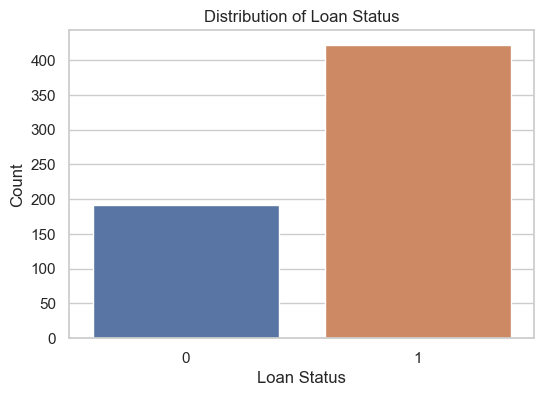

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


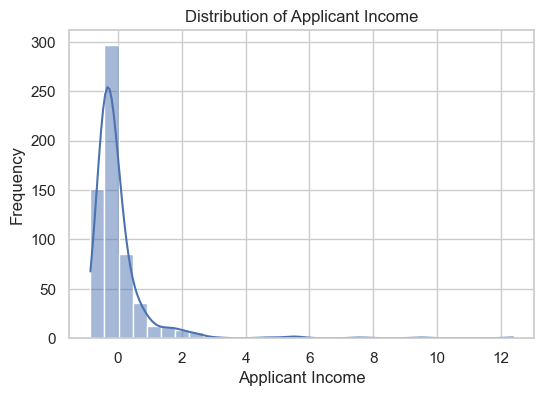

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


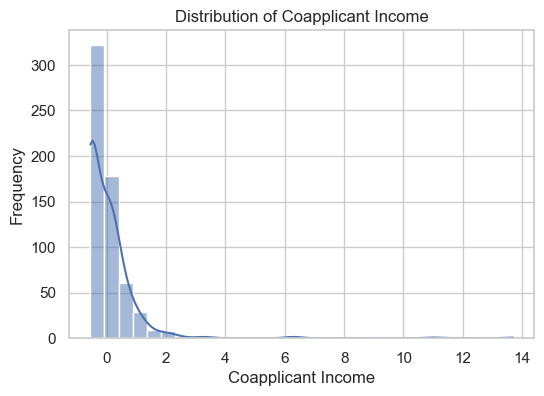

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


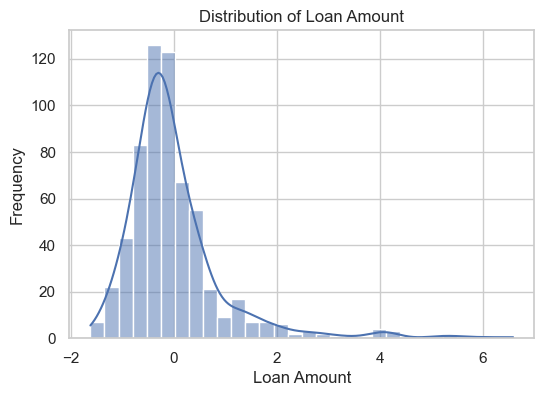

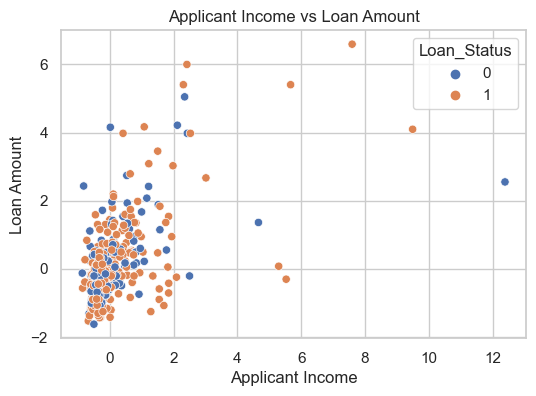

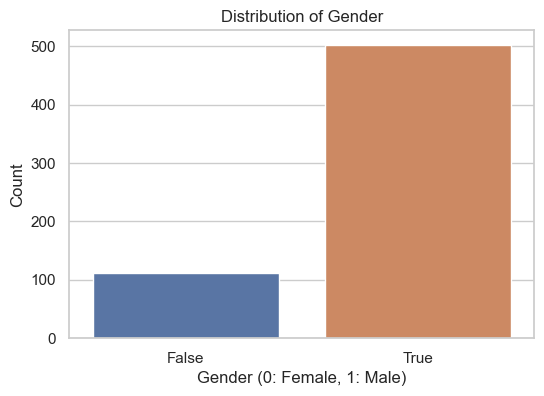

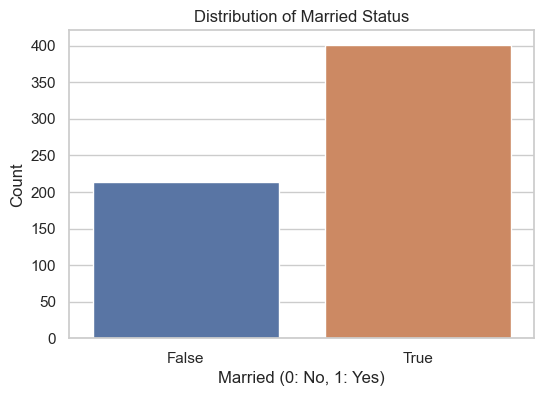

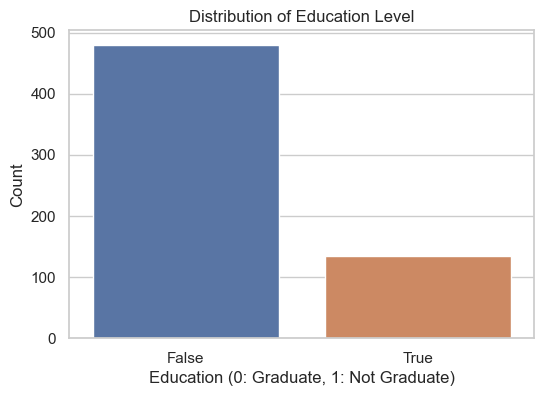

In [121]:

# Set the style for the plots
sns.set(style="whitegrid")

# Plot distribution of target variable Loan_Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=train_data)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# Plot distribution of ApplicantIncome
plt.figure(figsize=(6, 4))
sns.histplot(train_data['ApplicantIncome'], bins=30, kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of CoapplicantIncome
plt.figure(figsize=(6, 4))
sns.histplot(train_data['CoapplicantIncome'], bins=30, kde=True)
plt.title('Distribution of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of LoanAmount
plt.figure(figsize=(6, 4))
sns.histplot(train_data['LoanAmount'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Plot relationship between ApplicantIncome and LoanAmount
plt.figure(figsize=(6, 4))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=train_data)
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

# Plot distribution of Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender_Male', data=train_data)
plt.title('Distribution of Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

# Plot distribution of Married
plt.figure(figsize=(6, 4))
sns.countplot(x='Married_Yes', data=train_data)
plt.title('Distribution of Married Status')
plt.xlabel('Married (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Plot distribution of Education
plt.figure(figsize=(6, 4))
sns.countplot(x='Education_Not Graduate', data=train_data)
plt.title('Distribution of Education Level')
plt.xlabel('Education (0: Graduate, 1: Not Graduate)')
plt.ylabel('Count')
plt.show()


In [128]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

# Prepare the feature set for clustering (excluding the target variable)
X = train_data.drop(columns=['Loan_ID', 'Loan_Status'])

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
train_data['KMeans_Cluster'] = kmeans_labels

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X)
train_data['Hierarchical_Cluster'] = hierarchical_labels

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)
train_data['DBSCAN_Cluster'] = dbscan_labels

# Gaussian Mixture Models
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(X)
train_data['GMM_Cluster'] = gmm_labels

# Display the first few rows of the data with cluster labels
print(train_data.head())


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


    Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0  LP001002         0.072991          -0.554487   -0.211241          0.273231   
1  LP001003        -0.134412          -0.038732   -0.211241          0.273231   
2  LP001005        -0.393747          -0.554487   -0.948996          0.273231   
3  LP001006        -0.462062           0.251980   -0.306435          0.273231   
4  LP001008         0.097728          -0.554487   -0.056551          0.273231   

   Credit_History  Loan_Status  Gender_Male  Married_Yes  \
0             1.0            1         True        False   
1             1.0            0         True         True   
2             1.0            1         True         True   
3             1.0            1         True         True   
4             1.0            1         True        False   

   Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  \
0                   False              False                    False   
1     

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [130]:

# Split the data into training and validation sets
X = train_data.drop(columns=['Loan_ID', 'Loan_Status'])
y = train_data['Loan_Status']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression with L1 Regularization
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_l1.fit(X_train, y_train)
y_pred_l1 = log_reg_l1.predict(X_val)

# Evaluate the model
print("Accuracy with L1 Regularization:", accuracy_score(y_val, y_pred_l1))
print(confusion_matrix(y_val, y_pred_l1))
print(classification_report(y_val, y_pred_l1))

# Logistic Regression with L2 Regularization
log_reg_l2 = LogisticRegression(penalty='l2', solver='liblinear')
log_reg_l2.fit(X_train, y_train)
y_pred_l2 = log_reg_l2.predict(X_val)

# Evaluate the model
print("Accuracy with L2 Regularization:", accuracy_score(y_val, y_pred_l2))
print(confusion_matrix(y_val, y_pred_l2))
print(classification_report(y_val, y_pred_l2))

# Logistic Regression with ElasticNet Regularization
log_reg_elastic = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
log_reg_elastic.fit(X_train, y_train)
y_pred_elastic = log_reg_elastic.predict(X_val)

# Evaluate the model
print("Accuracy with ElasticNet Regularization:", accuracy_score(y_val, y_pred_elastic))
print(confusion_matrix(y_val, y_pred_elastic))
print(classification_report(y_val, y_pred_elastic))


Accuracy with L1 Regularization: 0.7886178861788617
[[18 25]
 [ 1 79]]
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Accuracy with L2 Regularization: 0.7886178861788617
[[18 25]
 [ 1 79]]
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Accuracy with ElasticNet Regularization: 0.7886178861788617
[[18 25]
 [ 1 79]]
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
